<a href="https://colab.research.google.com/github/khondokarsumaya/210101__CNN_with_FMNIST/blob/main/210101___CNN_with_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [24]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [25]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


In [26]:
from tensorflow.keras.layers import Input

model = Sequential()

model.add(Input(shape=(28,28,1))) # Added Input layer here
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [28]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.6415 - loss: 0.9859 - val_accuracy: 0.8263 - val_loss: 0.4598
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.8247 - loss: 0.4863 - val_accuracy: 0.8639 - val_loss: 0.3727
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 97ms/step - accuracy: 0.8548 - loss: 0.4024 - val_accuracy: 0.8769 - val_loss: 0.3423
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.8666 - loss: 0.3684 - val_accuracy: 0.8873 - val_loss: 0.3100
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - accuracy: 0.8789 - loss: 0.3379 - val_accuracy: 0.8944 - val_loss: 0.2927
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.8876 - loss: 0.3117 - val_accuracy: 0.8952 - val_loss: 0.2846
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.8947 - loss: 0.2902 - val_accuracy: 0.8984 - val_loss: 0.2790
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - accuracy: 0.8966 - loss: 0.2835 - 

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9060 - loss: 0.2759
Test Accuracy: 0.9023000001907349


In [30]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


In [31]:
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)
    return img


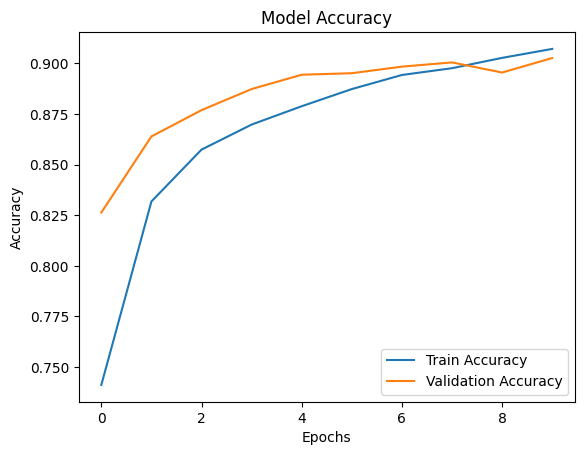

In [32]:
# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

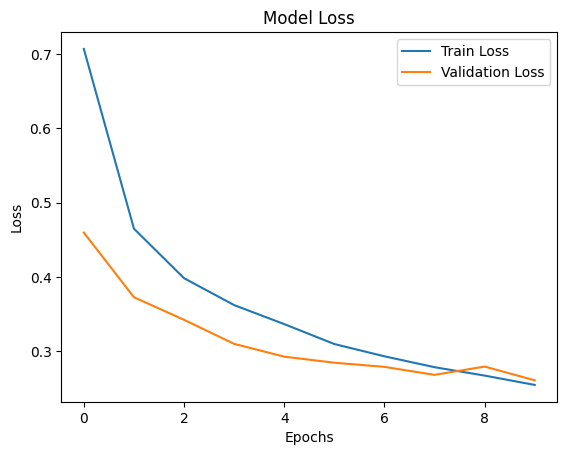

In [33]:
# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


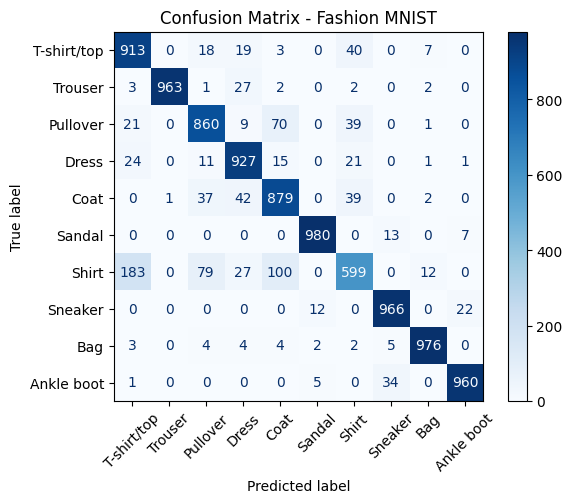

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


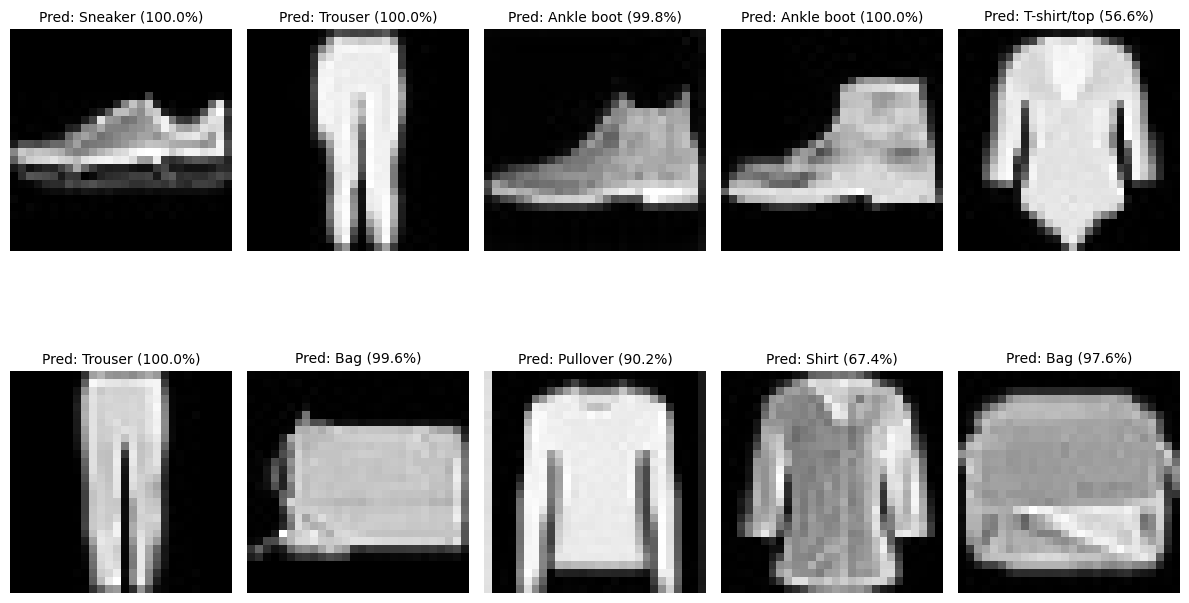

In [35]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_with_confidence(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    return img.reshape(28,28), class_names[class_index], confidence


dataset_path = "./210101__CNN_with_FMNIST/dataset"
images = os.listdir(dataset_path)

plt.figure(figsize=(12, 8))

for i, img_name in enumerate(images[:10]):
    img_path = os.path.join(dataset_path, img_name)

    img, label, conf = predict_with_confidence(img_path)

    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {label} ({conf:.1f}%)", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


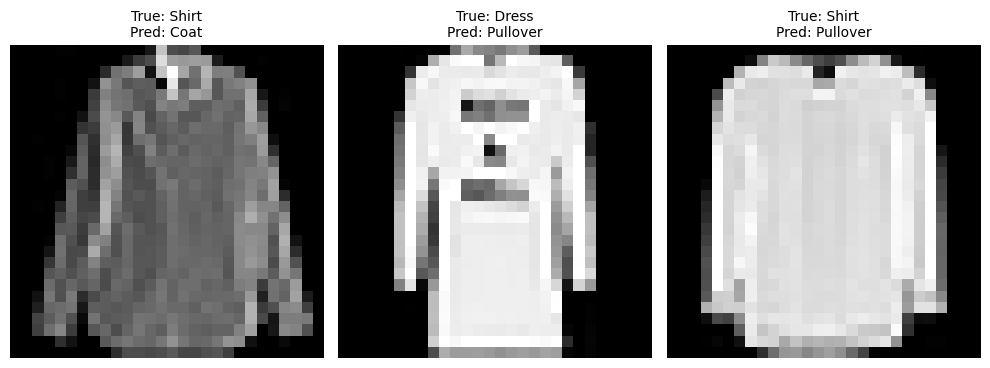

In [36]:
import random

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Find incorrect predictions
wrong_indices = np.where(y_pred_classes != y_true)[0]

# Pick 3 random wrong samples
sample_indices = random.sample(list(wrong_indices), 3)

plt.figure(figsize=(10, 4))

for i, idx in enumerate(sample_indices):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(
        f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}",
        fontsize=10
    )
    plt.axis('off')

plt.tight_layout()
plt.show()
